<a href="https://colab.research.google.com/github/gosaitos/Computer_vision/blob/main/Histogram_Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2

In [ ]:
img = cv2.cvtColor(imread("ts.jpg"),cv2.COLOR_RGB2GRAY)

In [ ]:
#Function for plot:

def plot(x,y,z,a):
    plt.subplot(3,2,z)
    if a is False:
        plt.imshow(x, cmap='gray')
        plt.axis('off')
        plt.title(f'{y} image')
    else:
        sns.histplot(x.flatten(),bins=256,kde=True)
        plt.ylim(0,8000)
        plt.title(f'{y} image')

***Histogram shifting:***

In [ ]:
    def histogram_shift(image,shift):
        shifted_image = image.copy().astype(np.int16)
        shifted_image = np.clip((shifted_image + shift),0,255)
        return shifted_image.astype(np.uint8)

    p_shift = histogram_shift(img,50)
    n_shift = histogram_shift(img,-50)

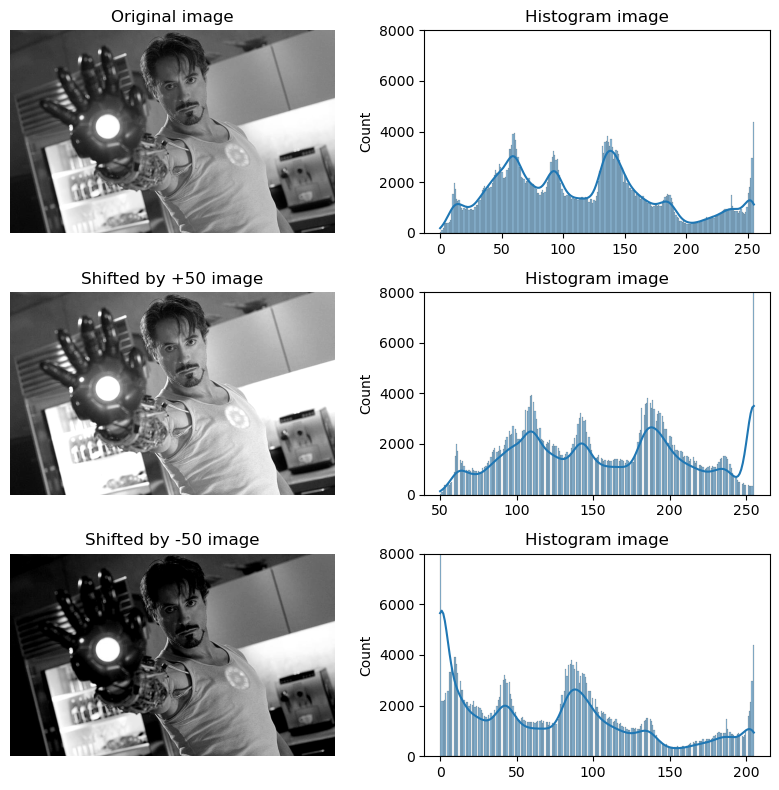

In [ ]:
plt.figure(figsize=(8,8))

plot(img,'Original',1,False)
plot(img,'Histogram',2,True)
plot(p_shift,"Shifted by +50",3,False)
plot(p_shift,"Histogram",4,True)
plot(n_shift,"Shifted by -50",5,False)
plot(n_shift,"Histogram",6,True)

plt.tight_layout()
plt.show()

***Threshold Limiting***

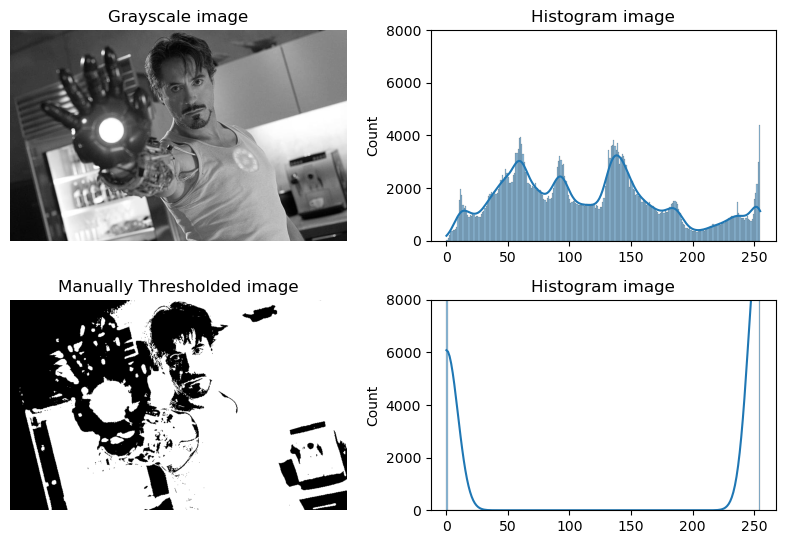

In [ ]:
thres_value = 80

binary_img = np.zeros_like(img)
binary_img[img > thres_value] = 255
plt.figure(figsize=(8,8))

plot(img,'Grayscale',1,False)
plot(img,'Histogram',2,True)
plot(binary_img,"Manually Thresholded",3,False)
plot(binary_img,"Histogram",4,True)

plt.tight_layout()
plt.show()

***Negative Image***

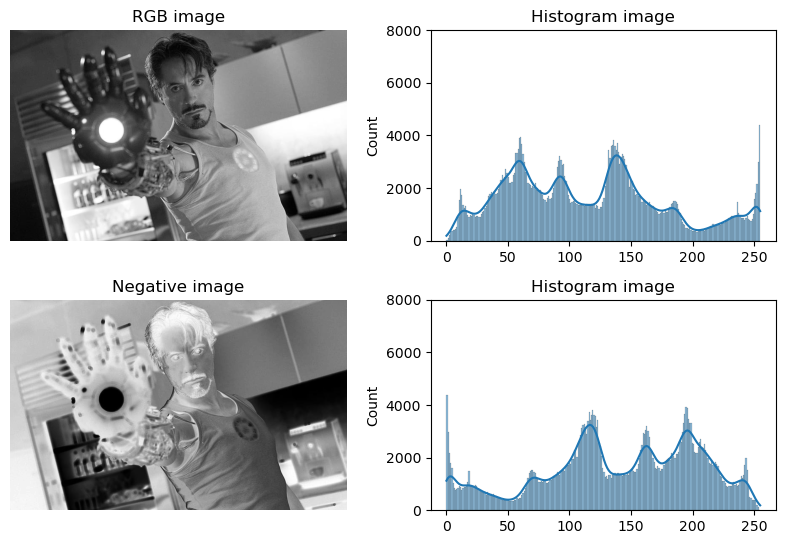

In [ ]:
neg = 255 - img

plt.figure(figsize=(8,8))
plot(img,'RGB',1,False)
plot(img,'Histogram',2,True)
plot(neg,'Negative',3,False)
plot(neg,'Histogram',4,True)

plt.tight_layout()
plt.show()

***Discrete Fourier Transform***

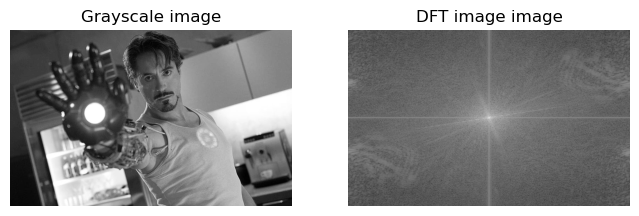

In [ ]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.figure(figsize=(8,8))
plot(img,'Grayscale',1,False)
plot(magnitude_spectrum,'DFT image',2,False)

plt.show()

***Contrast stretching***

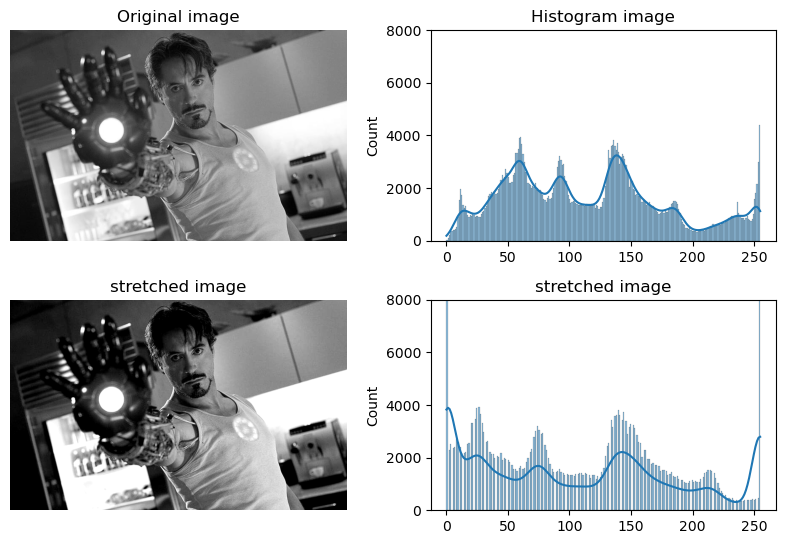

In [ ]:
new_img = img.copy()
new_img = img.astype(np.float32)
alpha = 1.5
enhanced_image = np.clip(alpha*(new_img-128)+128,0,255).astype(np.uint8)

plt.figure(figsize=(8,8))
plot(new_img,'Original',1,False)
plot(new_img,'Histogram',2,True)
plot(enhanced_image,'stretched',3,False)
plot(enhanced_image,'stretched',4,True)
plt.tight_layout()
plt.show()

***Linear filters***

In [ ]:
blur_kernel = np.ones((3, 3), dtype=np.float32) / 25

sharpen_kernel = np.array([[  0, -1,  0],
                            [ -1,  5, -1],
                            [  0, -1,  0]], dtype=np.float32)


def filters(kernel,img,a):
    height, width = img.shape
    final_img = np.zeros_like(img)
    padded_img = np.pad(img, pad_width=1,constant_values=0)

    for i in range(height):
        for j in range(width):
            region = padded_img[i:i+3, j:j+3]
            if a == True:
                final_img[i, j] = np.sum(region * kernel)
            else:
                new_pixel = np.sum(region * sharpen_kernel)
                final_img[i, j] = np.clip(new_pixel, 0, 255)

    return final_img

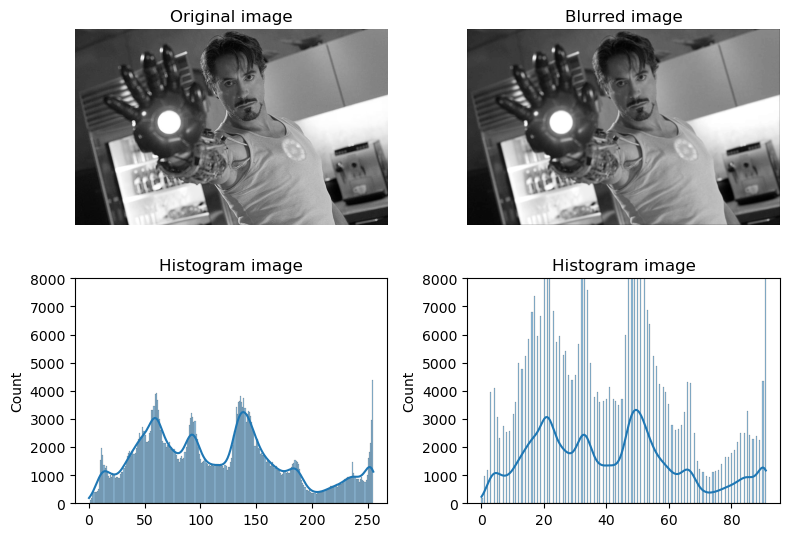

In [ ]:
blurred_img = filters(blur_kernel,img,True)

plt.figure(figsize=(8,8))
plot(img,'Original',1,False)
plot(blurred_img,'Blurred',2,False)
plot(img,'Histogram',3,True)
plot(blurred_img,'Histogram',4,True)

plt.tight_layout()
plt.show()

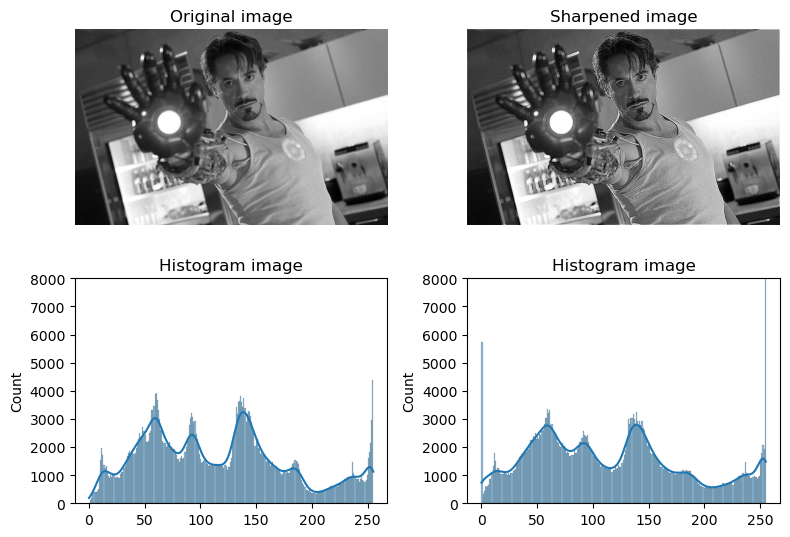

In [ ]:
sharpened_img = filters(sharpen_kernel,img,False)

plt.figure(figsize=(8,8))
plot(img,'Original',1,False)
plot(sharpened_img,'Sharpened',2,False)
plot(img,'Histogram',3,True)
plot(sharpened_img,'Histogram',4,True)

plt.tight_layout()
plt.show()